# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [ ]:
data_path = "winequality_red.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,ok
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,ok
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,ok
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,very good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,very good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,ok


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


### Одиночные признаки
#### Количественные признаки

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

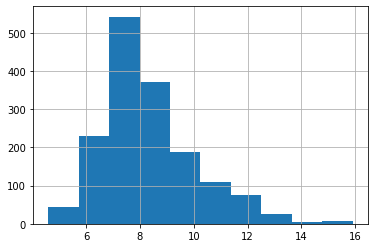

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['fixed acidity'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


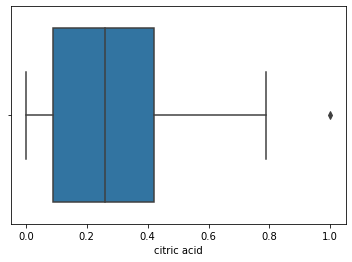

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['citric acid']);

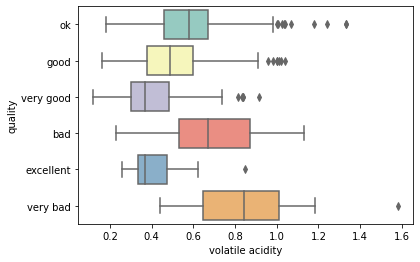

In [ ]:
top_data = data[['quality','volatile acidity']]
top_data = top_data.groupby('quality').sum()
top_data = top_data.sort_values('volatile acidity',ascending=False)
top_data = top_data[:6].index.values
sns.boxplot(y='quality', 
            x='volatile acidity', 
            data=data[data.quality.isin(top_data)], palette='Set3');

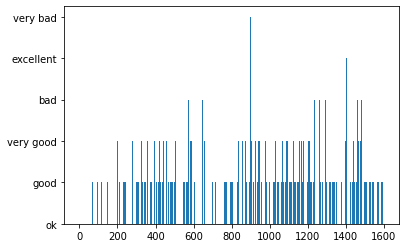

In [ ]:
plt.bar(data.index, data['quality'])
plt.show()

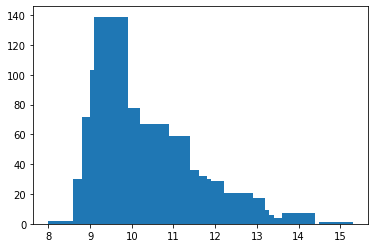

In [ ]:
hist = data['alcohol'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'acid' in f]
feats

['fixed acidity', 'volatile acidity', 'citric acid']

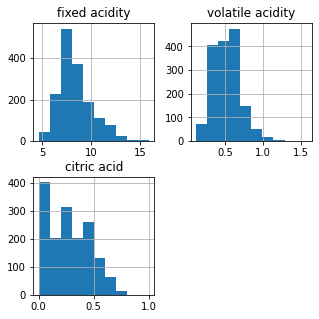

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

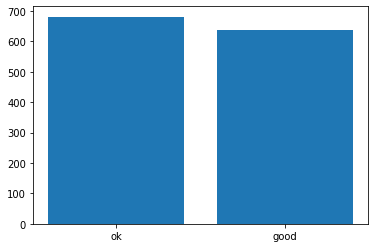

In [ ]:
# определение первых n "популярных" качеств вина
# data['State'].value_counts().head(10)
hist = data['quality'].value_counts().head(2)
plt.bar(hist.index, hist);


In [ ]:
# фактически бинарный признак
data['quality'].value_counts()

ok           681
good         638
very good    199
bad           53
excellent     18
very bad      10
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


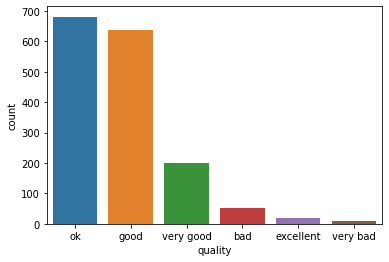

In [ ]:
# гистограмма для всех качеств
sns.countplot(data['quality']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


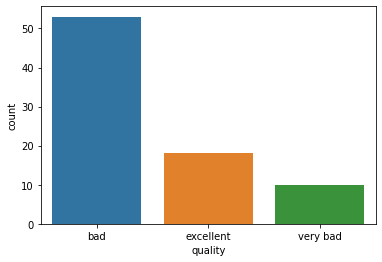

In [ ]:
# гистограмма "популярных" качеств
sns.countplot(data[data['quality'].isin(data['quality'].value_counts().tail(3).index)]['quality']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [ ]:
# список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

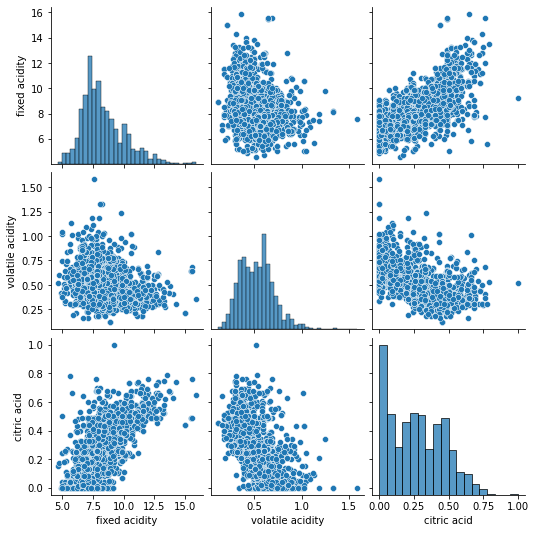

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

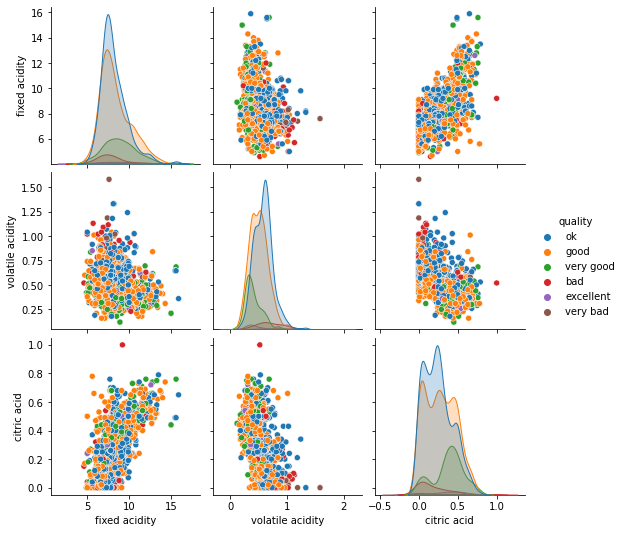

In [ ]:
sns.pairplot(data[feats + ['quality']], hue='quality');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

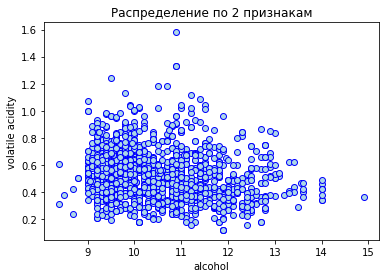

In [ ]:
plt.scatter(data['alcohol'], 
            data['volatile acidity'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Распределение по 2 признакам');

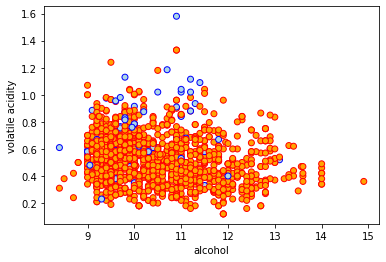

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от качества
c = data['quality'].map({"very bad": 'lightblue', "bad": 'lightblue', "ok": 'orange', "good": 'orange', "very good": 'orange', "excellent": 'orange'})
edge_c = data['quality'].map({"very bad": 'blue', "bad": 'blue', "ok": 'red', "good": 'red', "very good": 'red', "excellent": 'red'})
# Настройка графика
plt.scatter(data['alcohol'], data['volatile acidity'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('alcohol')
plt.ylabel('volatile acidity');

### Корреляция признаков

In [ ]:
# Применяется функция corr() из Pandas
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


В реальных задачах анализ такой матрицы затруднен,
необходимо или автоматизировать (скрипты), или визуализировать (графики)

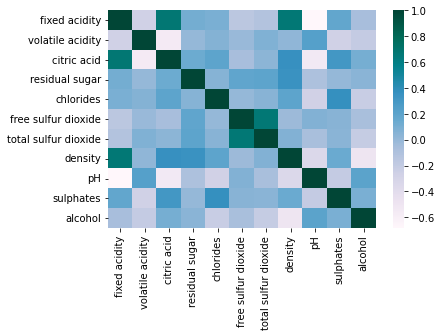

In [ ]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);

Из карты heatmap видно, что некоторые признаки коррелируют:
например сильная корреляция в парах (free sulfur dioxide, total sulfur dioxide), (citric acid, fixed acidity), (density, fixed acidity).
Из таких пар можно удалить один признак

In [ ]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(["free sulfur dioxide", "citric acid", "density"], axis=1)
data_uncorr.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков

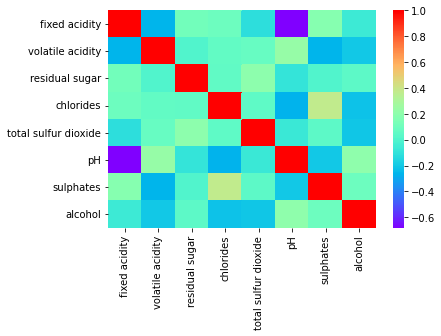

In [ ]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);